A Spark Session is used to create DataFrame, register DataFrame as tables, execute SQL over tables, cache tables. It is the entry point to programming Spark with the DataFrame API. We have created a SparkSession, using the following builder pattern:

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Chicago_crime_analysis").getOrCreate()

Providing pre-defined schema so that it makes the reading process faster.

In [4]:
from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)
crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])

Creating crimes dataframe for the above schema

In [6]:
crimes = spark.sql("select * from crimes___2001_to_present_9be1b_csv")
#display(crimes.select("*"))
#We can use limit to limit the number of columns we want to retrieve from a dataframe
crimes.select("*").limit(10). show(truncate = True)

+--------+-----------+--------------------+--------------------+----+-------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
 ID|Case Number| Date| Block|IUCR| Primary Type| Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year| Updated On| Latitude| Longitude| Location|
+--------+-----------+--------------------+--------------------+----+-------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
10000092| HY189866|03/18/2015 07:44:...| 047XX W OHIO ST|041A| BATTERY| AGGRAVATED: HANDGUN| STREET| false| false|1111| 011| 28| 25| 04B| 1144606| 1903566|2015|02/10/2018 03:50:...|41.891398861|-87.744384567|(41.891398861, -8...|
10000094| HY190059|03/18/2015 11:00:...|066XX S MARSHFIEL...|4625|OTHER OFFENSE| PAROLE VIOLATION| STREET| true| false|0725| 007| 15| 67| 26| 1166468| 1860715|2015|02/10/2018 03:50:...|41.773371528|-87.665319468|(41.773371528, -8...|
10000095| HY190052|03/18/2015 10:45:...|044XX S LAKE PARK...|0486| BATTERY|DOMESTIC BATTERY ...| APARTMENT| false| true|0222| 002| 4| 39| 08B| 1185075| 1875622|2015|02/10/2018 03:50:...| 41.81386068|-87.596642837|(41.81386068, -87...|
10000096| HY190054|03/18/2015 10:30:...|051XX S MICHIGAN AVE|0460| BATTERY| SIMPLE| APARTMENT| false| false|0225| 002| 3| 40| 08B| 1178033| 1870804|2015|02/10/2018 03:50:...|41.800802415|-87.622619343|(41.800802415, -8...|
10000097| HY189976|03/18/2015 09:00:...| 047XX W ADAMS ST|031A| ROBBERY| ARMED: HANDGUN| SIDEWALK| false| false|1113| 011| 28| 25| 03| 1144920| 1898709|2015|02/10/2018 03:50:...|41.878064761|-87.743354013|(41.878064761, -8...|
10000098| HY190032|03/18/2015 10:00:...| 049XX S DREXEL BLVD|0460| BATTERY| SIMPLE| APARTMENT| false| false|0223| 002| 4| 39| 08B| 1183018| 1872537|2015|02/10/2018 03:50:...|41.805443345|-87.604283976|(41.805443345, -8...|
10000099| HY190047|03/18/2015 11:00:...| 070XX S MORGAN ST|0486| BATTERY|DOMESTIC BATTERY ...| APARTMENT| false| true|0733| 007| 17| 68| 08B| 1170859| 1858210|2015|02/10/2018 03:50:...|41.766402779|-87.649296123|(41.766402779, -8...|
10000100| HY189988|03/18/2015 09:35:...| 042XX S PRAIRIE AVE|0486| BATTERY|DOMESTIC BATTERY ...| APARTMENT| false| true|0213| 002| 3| 38| 08B| 1178746| 1876914|2015|02/10/2018 03:50:...|41.817552577|-87.619818523|(41.817552577, -8...|
10000101| HY190020|03/18/2015 10:09:...| 036XX S WOLCOTT AVE|1811| NARCOTICS|POSS: CANNABIS 30...| STREET| true| false|0912| 009| 11| 59| 18| 1164279| 1880656|2015|02/10/2018 03:50:...|41.828138428|-87.672782106|(41.828138428, -8...|
10000104| HY189964|03/18/2015 09:25:...| 097XX S PRAIRIE AVE|0460| BATTERY| SIMPLE|RESIDENCE PORCH/H...| false| false|0511| 005| 6| 49| 08B| 1179637| 1840444|2015|02/10/2018 03:50:...| 41.71745472|-87.617663257|(41.71745472, -87...|
+--------+-----------+--------------------+--------------------+----+-------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+

In [7]:
print(" The crimes dataframe has {} records".format(crimes.count()))

The crimes dataframe has 6652608 records

In [8]:
crimes.columns

Out[ 5 ]: 
['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [9]:
crimes.dtypes

Out[ 6 ]: 
[('ID', 'string'),
 ('Case Number', 'string'),
 ('Date', 'string'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('Primary Type', 'string'),
 ('Description', 'string'),
 ('Location Description', 'string'),
 ('Arrest', 'string'),
 ('Domestic', 'string'),
 ('Beat', 'string'),
 ('District', 'string'),
 ('Ward', 'string'),
 ('Community Area', 'string'),
 ('FBI Code', 'string'),
 ('X Coordinate', 'string'),
 ('Y Coordinate', 'string'),
 ('Year', 'string'),
 ('Updated On', 'string'),
 ('Latitude', 'string'),
 ('Longitude', 'string'),
 ('Location', 'string')]

In [10]:
crimes.select("Date").show(10, truncate = False)

+----------------------+
Date |
+----------------------+
03/18/2015 07:44:00 PM|
03/18/2015 11:00:00 PM|
03/18/2015 10:45:00 PM|
03/18/2015 10:30:00 PM|
03/18/2015 09:00:00 PM|
03/18/2015 10:00:00 PM|
03/18/2015 11:00:00 PM|
03/18/2015 09:35:00 PM|
03/18/2015 10:09:00 PM|
03/18/2015 09:25:00 PM|
+----------------------+
only showing top 10 rows

The Date column is in string format. We have changed it to timestamp format using the user-defined functions (udf).withColumn created a new column and drop is used to remove one or more columns.
The Date column is in string format. Let’s change it to timestamp format using the user-defined functions (udf).withColumn helps to create a new column and we remove one or more columns with drop

In [12]:
from datetime import datetime
from pyspark.sql.functions import col,udf
myfunc =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
df = crimes.withColumn('Date_time', myfunc(col('Date'))).drop("Date")
df.select(df["Date_time"]).show(5)


+-------------------+
 Date_time|
+-------------------+
2015-03-18 19:44:00|
2015-03-18 23:00:00|
2015-03-18 22:45:00|
2015-03-18 22:30:00|
2015-03-18 21:00:00|
+-------------------+
only showing top 5 rows

In [13]:
#Calculate statistics of numeric and string columns

crimes.select(["Latitude","Longitude","Year","X Coordinate","Y Coordinate"]).describe().show()

+-------+-------------------+-------------------+------------------+------------------+------------------+
summary| Latitude| Longitude| Year| X Coordinate| Y Coordinate|
+-------+-------------------+-------------------+------------------+------------------+------------------+
 count| 6593609| 6593609| 6652608| 6593609| 6593609|
 mean| 41.84194356336852| -87.67184168943997|2008.1824150769141|1164506.1811642153|1885694.8644916615|
 stddev|0.09009073521100815|0.06220741199043314| 4.908050664525402|17191.847379536757| 32739.09391392891|
 min| 36.619446395| -87.524529378| 2001| 0| 0|
 max| 42.022910333| -91.686565684| 2018| 1205119| 1951622|
+-------+-------------------+-------------------+------------------+------------------+------------------+

In [14]:
#round the columns using format_number from PySpark’s the functions.
from pyspark.sql.functions import format_number
result = crimes.select("Latitude","Longitude","Year","X Coordinate","Y Coordinate").describe()
result.select(result['summary'],
              format_number(result['Latitude'].cast('float'),2).alias('Latitude'),
              format_number(result['Longitude'].cast('float'),2).alias('Longitude'),
              result['Year'].cast('int').alias('year'),
              format_number(result['X Coordinate'].cast('float'),2).alias('X Coordinate'),
              format_number(result['Y Coordinate'].cast('float'),2).alias('Y Coordinate')
             ).show()

+-------+------------+------------+-------+------------+------------+
summary| Latitude| Longitude| year|X Coordinate|Y Coordinate|
+-------+------------+------------+-------+------------+------------+
 count|6,593,609.00|6,593,609.00|6652608|6,593,609.00|6,593,609.00|
 mean| 41.84| -87.67| 2008|1,164,506.12|1,885,694.88|
 stddev| 0.09| 0.06| 4| 17,191.85| 32,739.09|
 min| 36.62| -87.52| 2001| 0.00| 0.00|
 max| 42.02| -91.69| 2018|1,205,119.00|1,951,622.00|
+-------+------------+------------+-------+------------+------------+

In [15]:
crimes.select("Primary Type").describe()
#(10, truncate = False)

Out[ 11 ]: DataFrame[summary: string, Primary Type: string]

Counting the crime types in the dataframe.

In [17]:
Primary_Type = crimes.select("Primary Type").distinct().count()

In [18]:
crimes.select("Primary Type").distinct().show(n = 35)

+--------------------+
 Primary Type|
+--------------------+
OFFENSE INVOLVING...|
 STALKING|
PUBLIC PEACE VIOL...|
 OBSCENITY|
NON-CRIMINAL (SUB...|
 ARSON|
 DOMESTIC VIOLENCE|
 GAMBLING|
 CRIMINAL TRESPASS|
 ASSAULT|
 NON - CRIMINAL|
LIQUOR LAW VIOLATION|
 MOTOR VEHICLE THEFT|
 THEFT|
 BATTERY|
 ROBBERY|
 HOMICIDE|
 RITUALISM|
 PUBLIC INDECENCY|
 CRIM SEXUAL ASSAULT|
 HUMAN TRAFFICKING|
 INTIMIDATION|
 PROSTITUTION|
 DECEPTIVE PRACTICE|
CONCEALED CARRY L...|
 SEX OFFENSE|
 CRIMINAL DAMAGE|
 NARCOTICS|
 NON-CRIMINAL|
 OTHER OFFENSE|
 KIDNAPPING|
 BURGLARY|
 WEAPONS VIOLATION|
OTHER NARCOTIC VI...|
INTERFERENCE WITH...|
+--------------------+

We can determine acoording to the primary type how many number of crimes occur for example.How many homicides are there in the dataset?

In [20]:
#homicide crime number
crimes.where(crimes["Primary Type"] == "HOMICIDE").count()

Out[ 14 ]: 9197

We are using matplotlib and Pandas to visualize the total number of crimes per year.

In [22]:
count = [item[1] for item in df.groupBy("Year").count().collect()]
year = [item[0] for item in df.groupBy("Year").count().collect()]
number_of_crimes_per_year = {"count":count, "year" : year}
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
number_of_crimes_per_year = pd.DataFrame(number_of_crimes_per_year)
number_of_crimes_per_year.head()

%matplotlib inline is not supported in Databricks.
You can display matplotlib figures using display(). For an example, see https://docs.databricks.com/user-guide/visualizations/matplotlib-and-ggplot.html
 Out[ 15 ]: 
 count year
0 268628 2016
1 335876 2012
2 267431 2017
3 275076 2014
4 306967 2013

In [23]:
df.groupBy("Year").count().orderBy("Year",ascending = True).show()
df.groupBy("Year").count().collect()

+----+------+
Year| count|
+----+------+
2001|485743|
2002|486750|
2003|475932|
2004|469374|
2005|453697|
2006|448087|
2007|436986|
2008|427024|
2009|392646|
2010|370271|
2011|351722|
2012|335876|
2013|306967|
2014|275076|
2015|263796|
2016|268628|
2017|267431|
2018|136602|
+----+------+

 Out[ 16 ]: 
[Row(Year=u'2016', count=268628),
 Row(Year=u'2012', count=335876),
 Row(Year=u'2017', count=267431),
 Row(Year=u'2014', count=275076),
 Row(Year=u'2013', count=306967),
 Row(Year=u'2005', count=453697),
 Row(Year=u'2002', count=486750),
 Row(Year=u'2009', count=392646),
 Row(Year=u'2018', count=136602),
 Row(Year=u'2006', count=448087),
 Row(Year=u'2004', count=469374),
 Row(Year=u'2011', count=351722),
 Row(Year=u'2008', count=427024),
 Row(Year=u'2007', count=436986),
 Row(Year=u'2015', count=263796),
 Row(Year=u'2001', count=485743),
 Row(Year=u'2010', count=370271),
 Row(Year=u'2003', count=475932)]

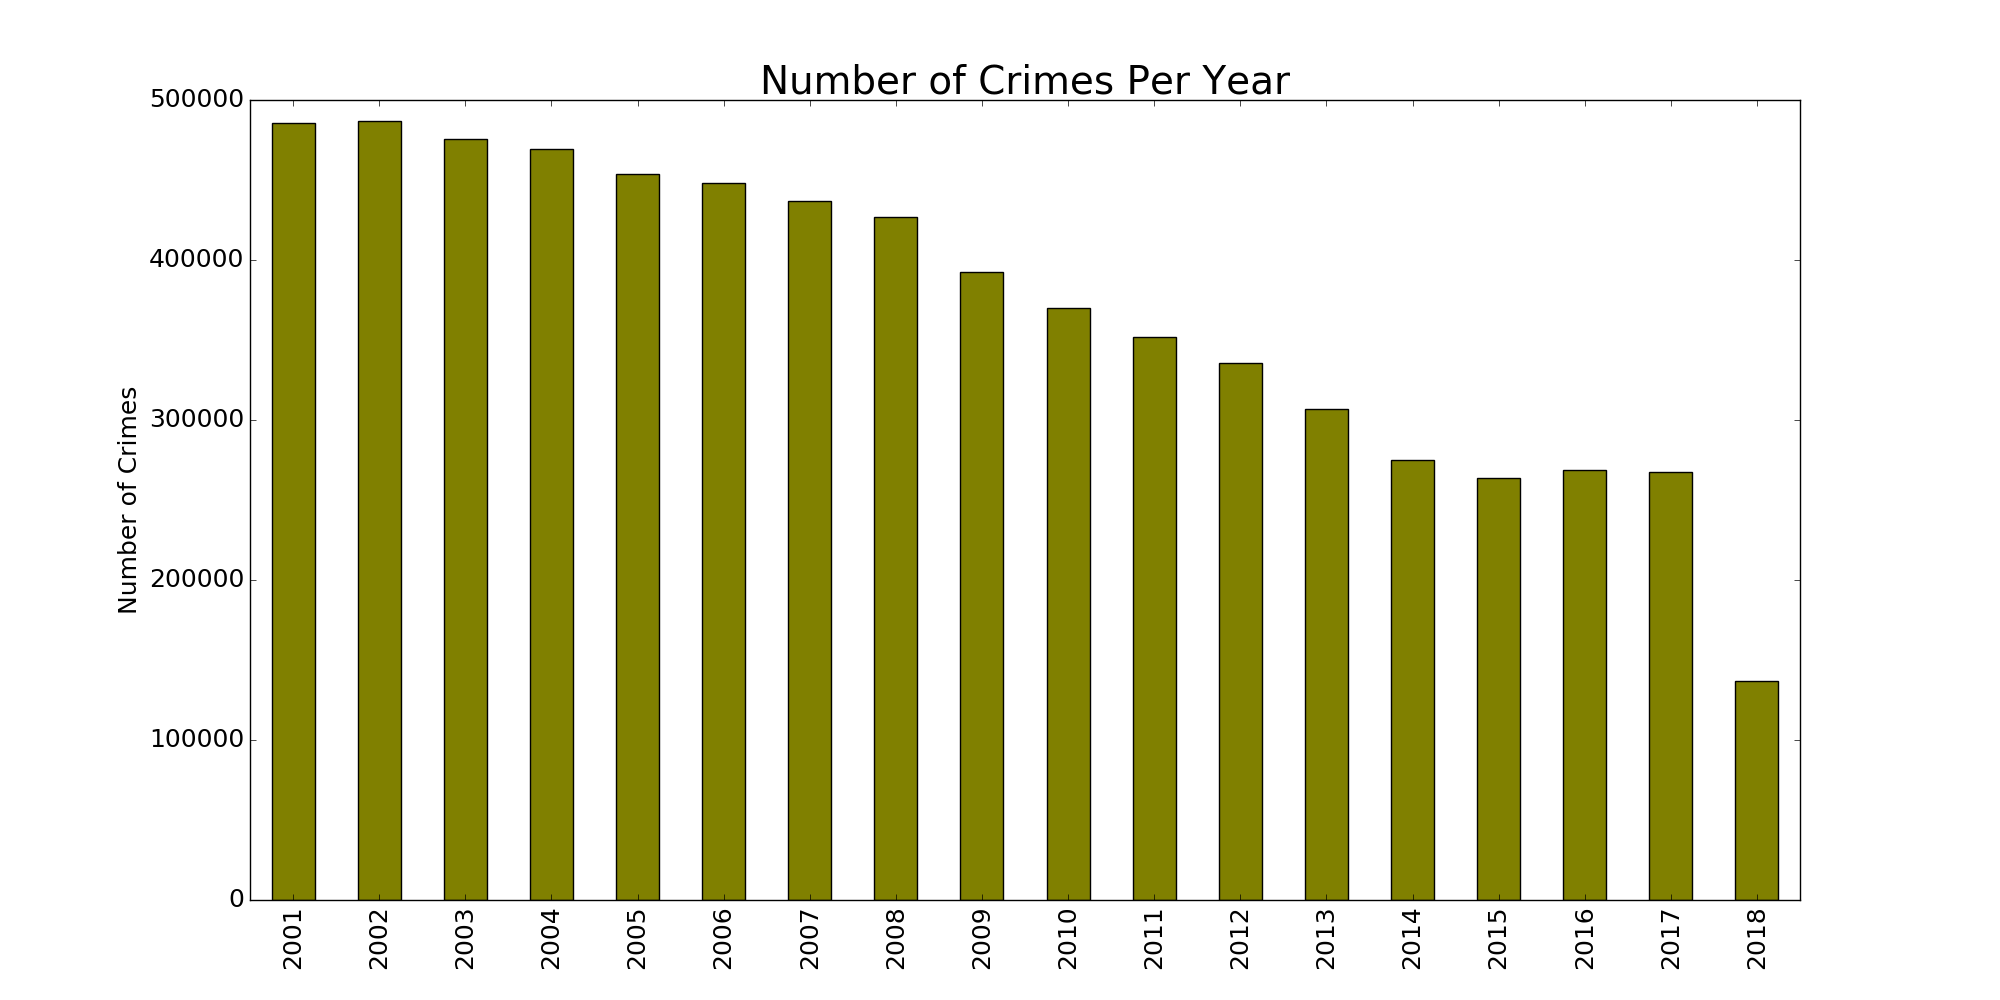

In [24]:
number_of_crimes_per_year = number_of_crimes_per_year.sort_values(by = "year")
number_of_crimes_per_year.plot(figsize = (20,10), kind = "bar", color = "olive",
                               x = "year", y = "count", legend = False)
plt.xlabel("", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Year", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()
display()

We can see that in the year 2002 there were highest number of crimes occuring and 2015 has the lowest. We can cannot take 2018 as the lowest as we have taken data till date so the years data is not complete.

Also we can plot number of crimes by month

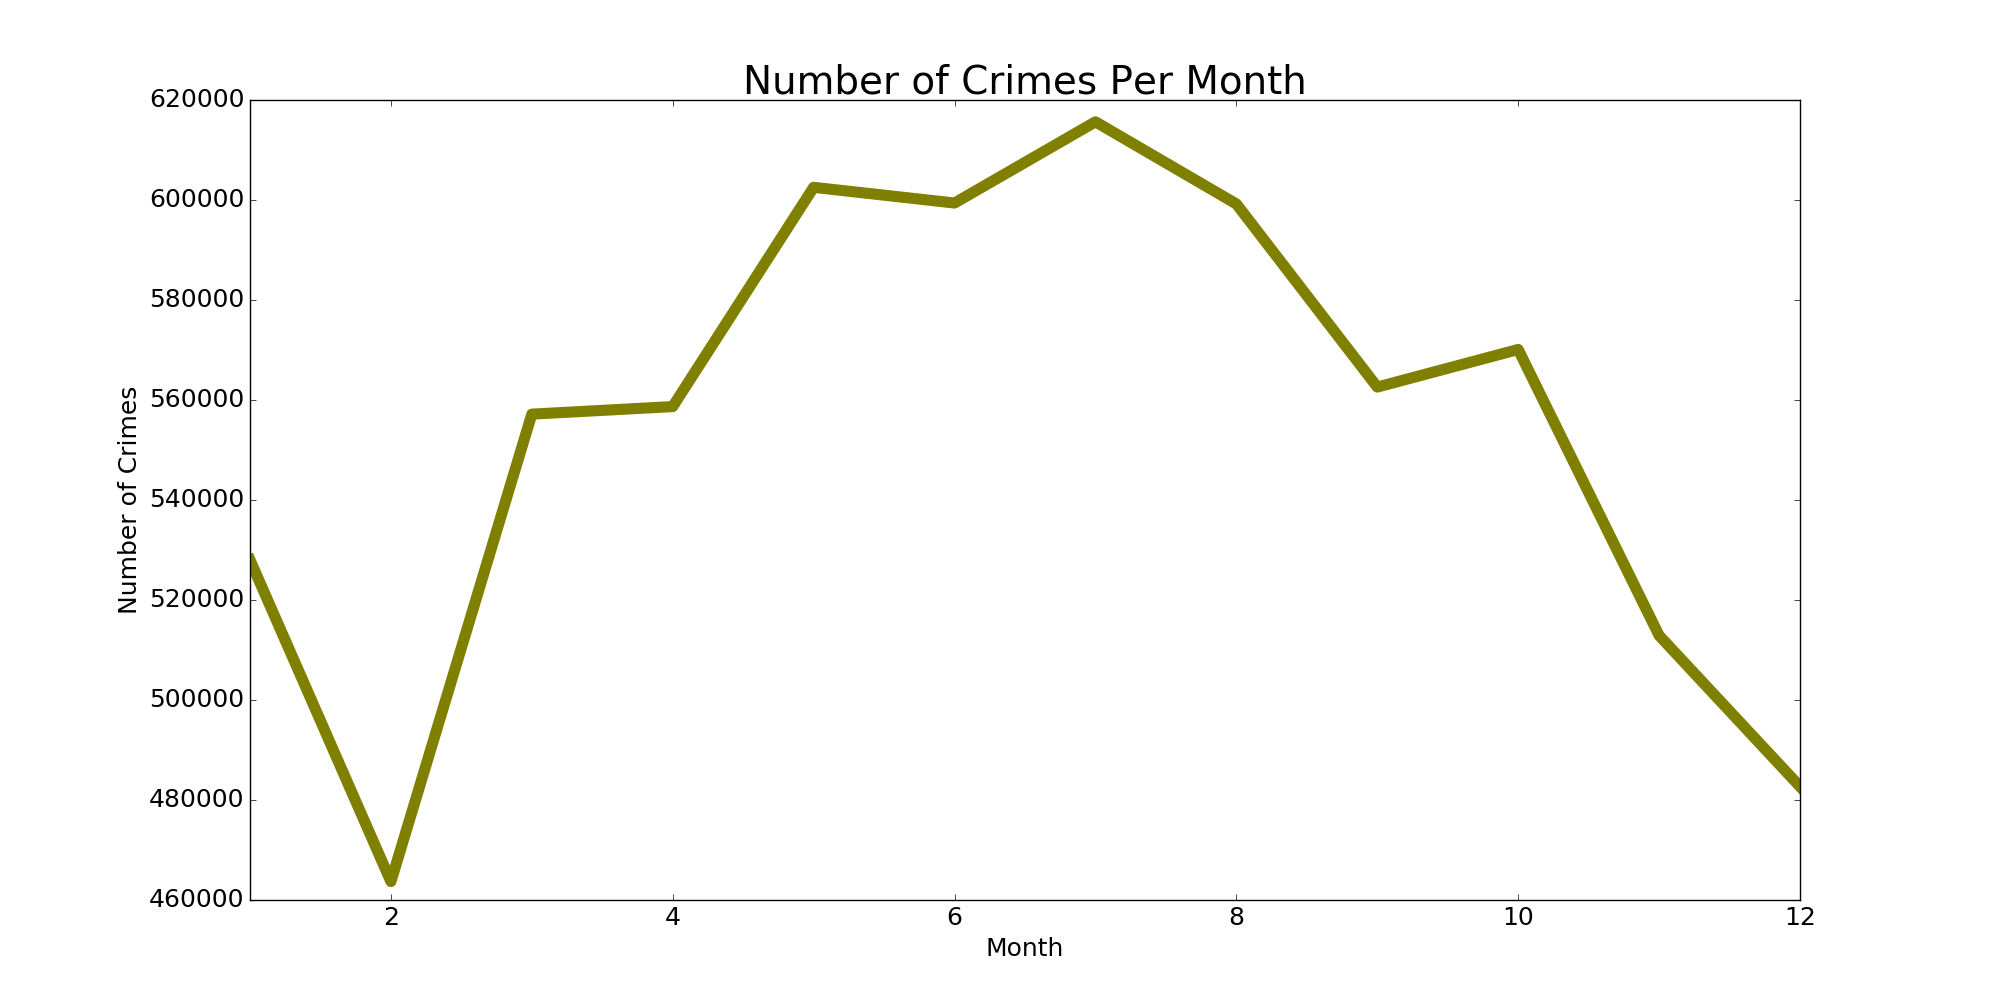

In [27]:
from pyspark.sql.functions import month
monthdf = df.withColumn("Month",month("Date_time"))
monthCounts = monthdf.select("Month").groupBy("Month").count()
monthCounts = monthCounts.collect()
months = [item[0] for item in monthCounts]
count = [item[1] for item in monthCounts]
crimes_per_month = {"month":months, "crime_count": count}
crimes_per_month = pd.DataFrame(crimes_per_month)
crimes_per_month = crimes_per_month.sort_values(by = "month")
crimes_per_month.plot(figsize = (20,10), kind = "line", x = "month", y = "crime_count", 
                      color = "olive", linewidth = 8, legend = False)
plt.xlabel("Month", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Month", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()
display()

In [28]:
monthCounts = monthdf.select("Month").groupBy("Month").count().orderBy("Month", ascending = True).show()

+-----+------+
Month| count|
+-----+------+
 1|528017|
 2|463682|
 3|557170|
 4|558683|
 5|602536|
 6|599396|
 7|615639|
 8|599212|
 9|562584|
 10|570103|
 11|512904|
 12|482682|
+-----+------+

Here it is seen that highest number of crimes occur in the month of July and Lowest occur in Febuary.

We have plot the number of crimes by the location of the ceime where it occured.

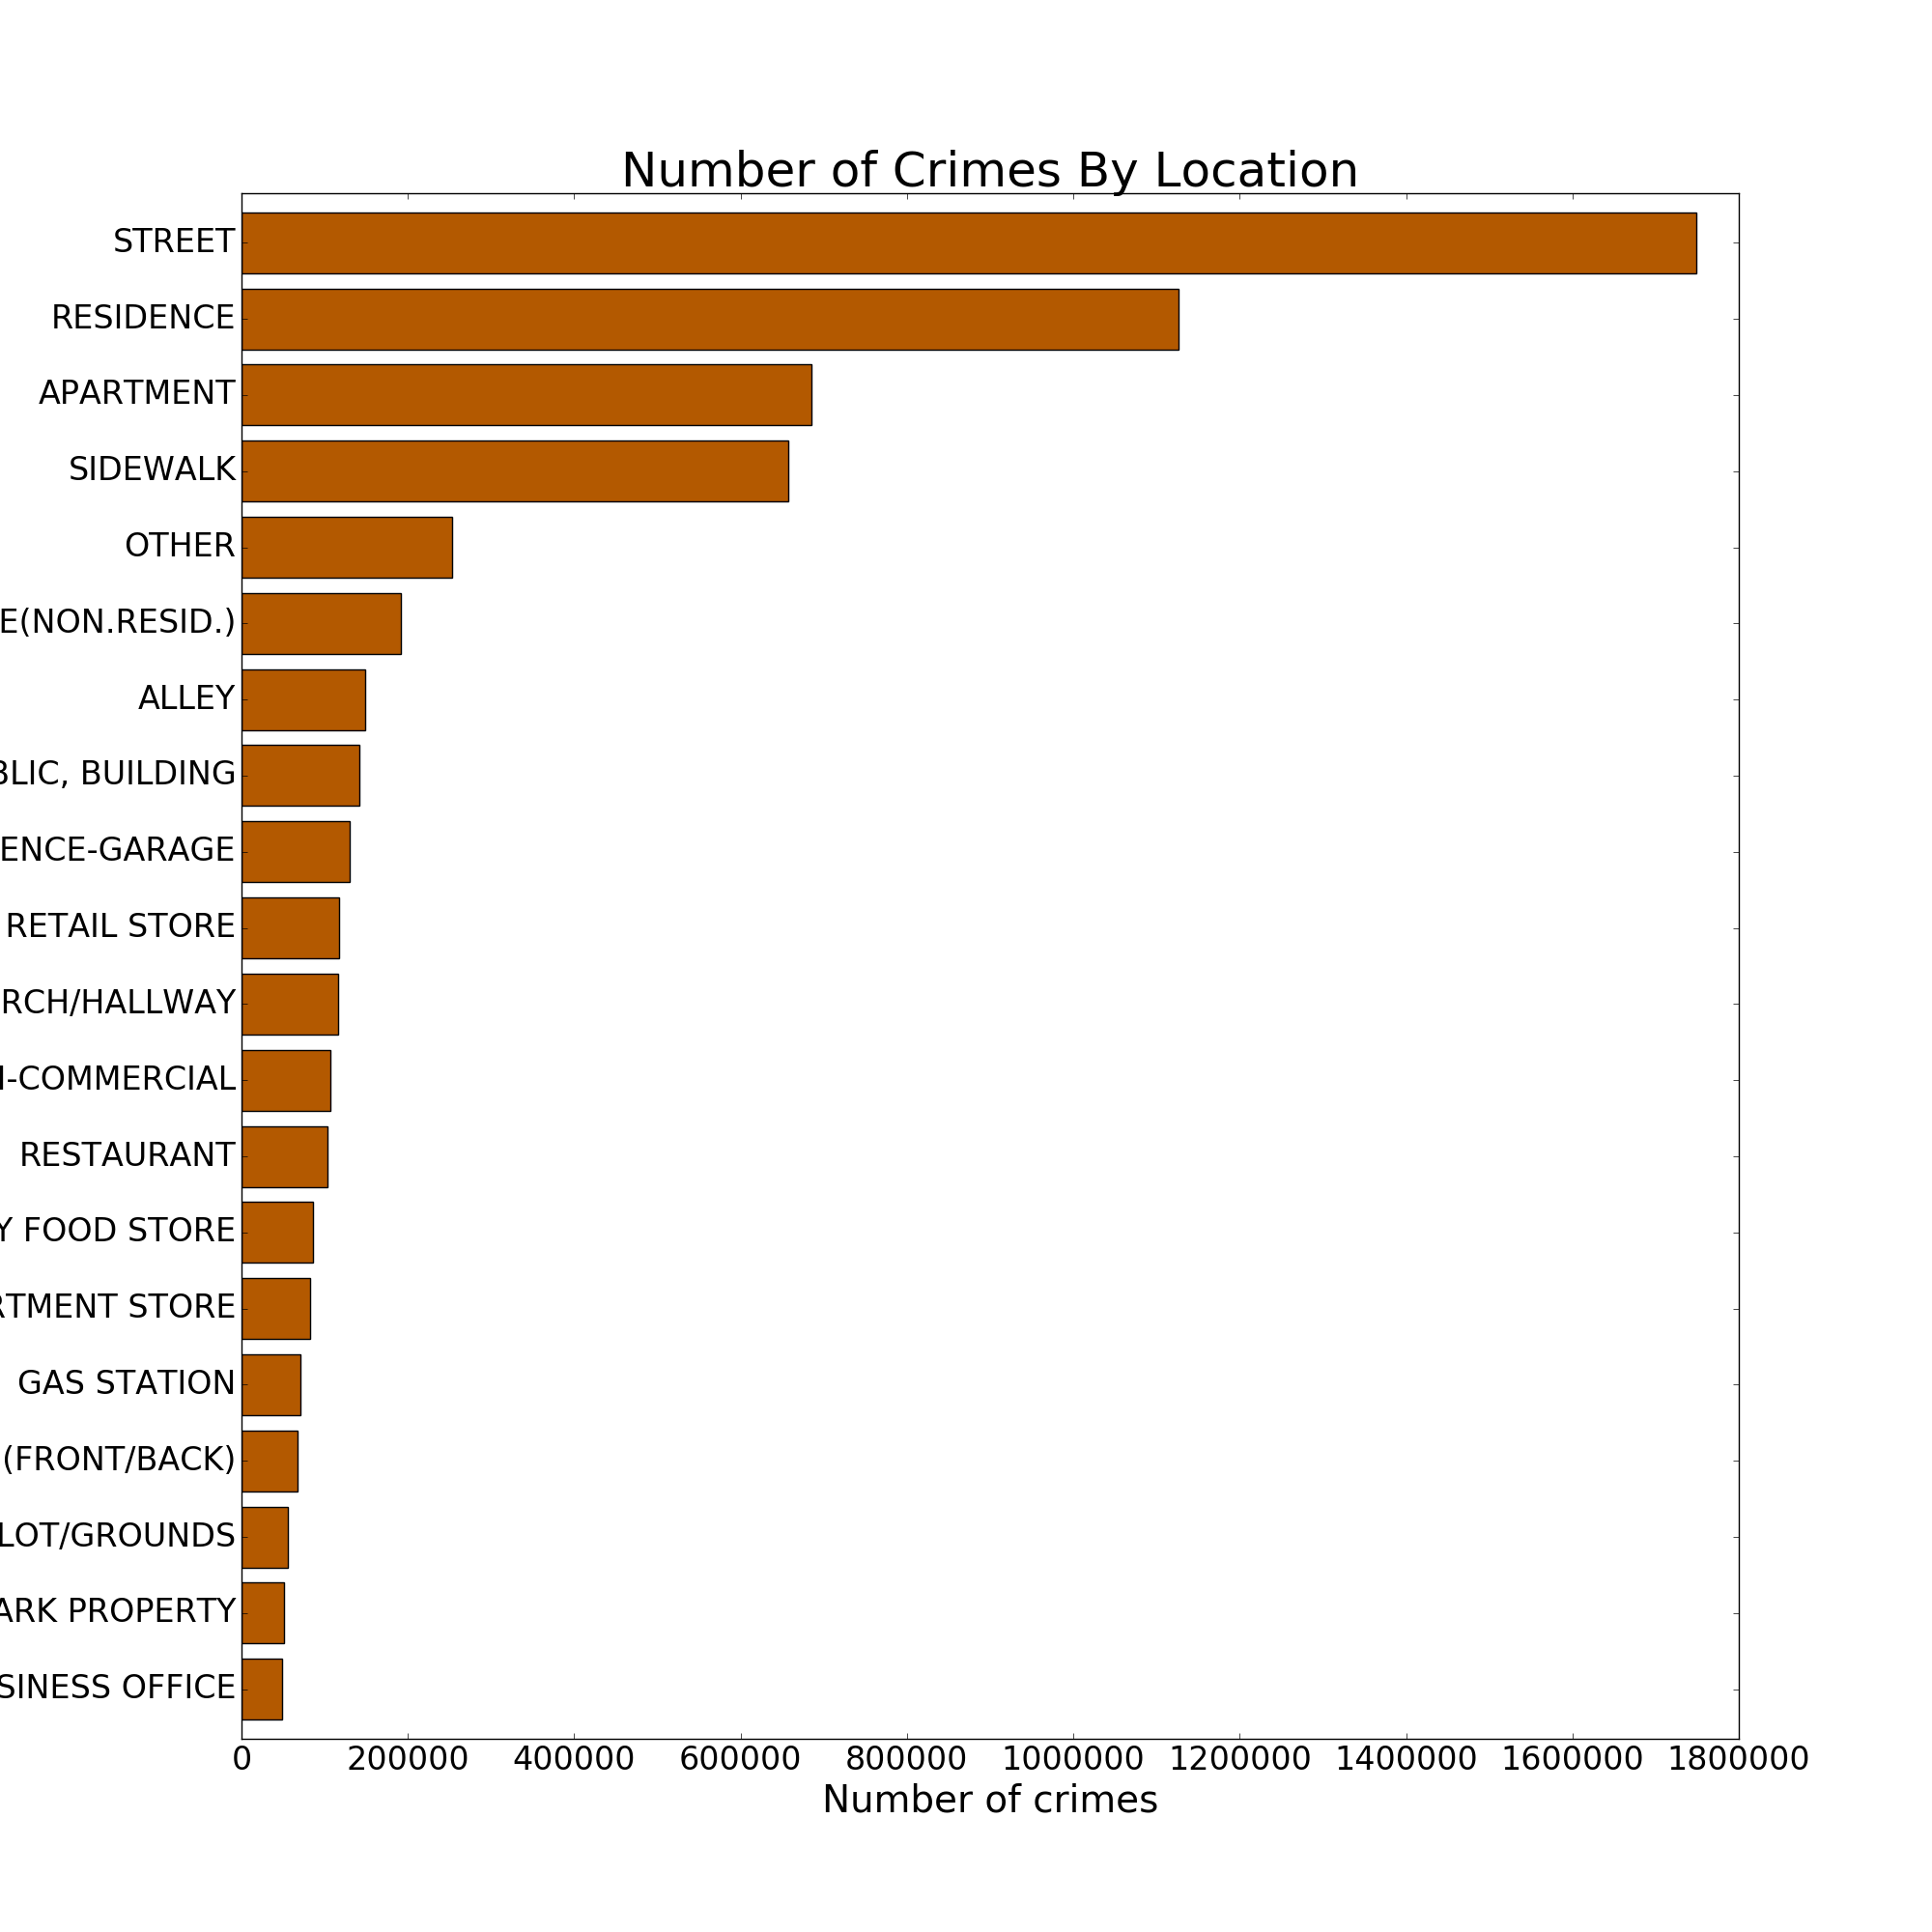

In [31]:
crime_location  = crimes.groupBy("Location Description").count().collect()
location = [item[0] for item in crime_location]
count = [item[1] for item in crime_location]
crime_location = {"location" : location, "count": count}
crime_location = pd.DataFrame(crime_location)
crime_location = crime_location.sort_values(by = "count", ascending  = False)
crime_location = crime_location.iloc[:20]
myplot = crime_location .plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "location", y = "count", legend = False)
myplot.invert_yaxis()
plt.xlabel("Number of crimes", fontsize = 28)
plt.ylabel("Crime Location", fontsize = 28)
plt.title("Number of Crimes By Location", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()
display()


We can see that highest number of crimes occur on street.

In [33]:
#Using a pandas dataframe
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


In [34]:
crimes = pd.read_csv("/dbfs/FileStore/tables/Crimes___2001_to_present-9be1b.csv", header='infer')

In [35]:
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

In [36]:
crimes.head(5)

Out[ 24 ]: 
 ID Case Number Date Block IUCR \
0 10000092 HY189866 03/18/2015 07:44:00 PM 047XX W OHIO ST 041A 
1 10000094 HY190059 03/18/2015 11:00:00 PM 066XX S MARSHFIELD AVE 4625 
2 10000095 HY190052 03/18/2015 10:45:00 PM 044XX S LAKE PARK AVE 0486 
3 10000096 HY190054 03/18/2015 10:30:00 PM 051XX S MICHIGAN AVE 0460 
4 10000097 HY189976 03/18/2015 09:00:00 PM 047XX W ADAMS ST 031A 

 Primary Type Description Location Description Arrest \
0 BATTERY AGGRAVATED: HANDGUN STREET False 
1 OTHER OFFENSE PAROLE VIOLATION STREET True 
2 BATTERY DOMESTIC BATTERY SIMPLE APARTMENT False 
3 BATTERY SIMPLE APARTMENT False 
4 ROBBERY ARMED: HANDGUN SIDEWALK False 

 Domestic ... Ward Community Area FBI Code \
0 False ... 28.0 25.0 04B 
1 False ... 15.0 67.0 26 
2 True ... 4.0 39.0 08B 
3 False ... 3.0 40.0 08B 
4 False ... 28.0 25.0 03 

 X Coordinate Y Coordinate Year Updated On Latitude \
0 1144606.0 1903566.0 2015 02/10/2018 03:50:01 PM 41.891399 
1 1166468.0 1860715.0 2015 02/10/2018 03:50:01 PM 41.773372 
2 1185075.0 1875622.0 2015 02/10/2018 03:50:01 PM 41.813861 
3 1178033.0 1870804.0 2015 02/10/2018 03:50:01 PM 41.800802 
4 1144920.0 1898709.0 2015 02/10/2018 03:50:01 PM 41.878065 

 Longitude Location 
0 -87.744385 (41.891398861, -87.744384567) 
1 -87.665319 (41.773371528, -87.665319468) 
2 -87.596643 (41.81386068, -87.596642837) 
3 -87.622619 (41.800802415, -87.622619343) 
4 -87.743354 (41.878064761, -87.743354013) 

[5 rows x 22 columns]

In [37]:
crimes.drop(['Case Number','IUCR','FBI Code','Updated On','Location',
                 'X Coordinate','Y Coordinate','Location'], inplace = True, axis = 1)

In [38]:
crimes.Date = pd.to_datetime(crimes.Date, format = '%m/%d/%Y %I:%M:%S %p')
crimes.index = pd.DatetimeIndex(crimes.Date)

In [39]:
crimes['Primary Type'] = pd.Categorical(crimes['Primary Type'])
crimes['Description'] = pd.Categorical(crimes['Description'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])

In [40]:
crimes_date = crimes.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = crimes.index.date, fill_value = 0)
crimes_date.index = pd.DatetimeIndex(crimes_date.index)

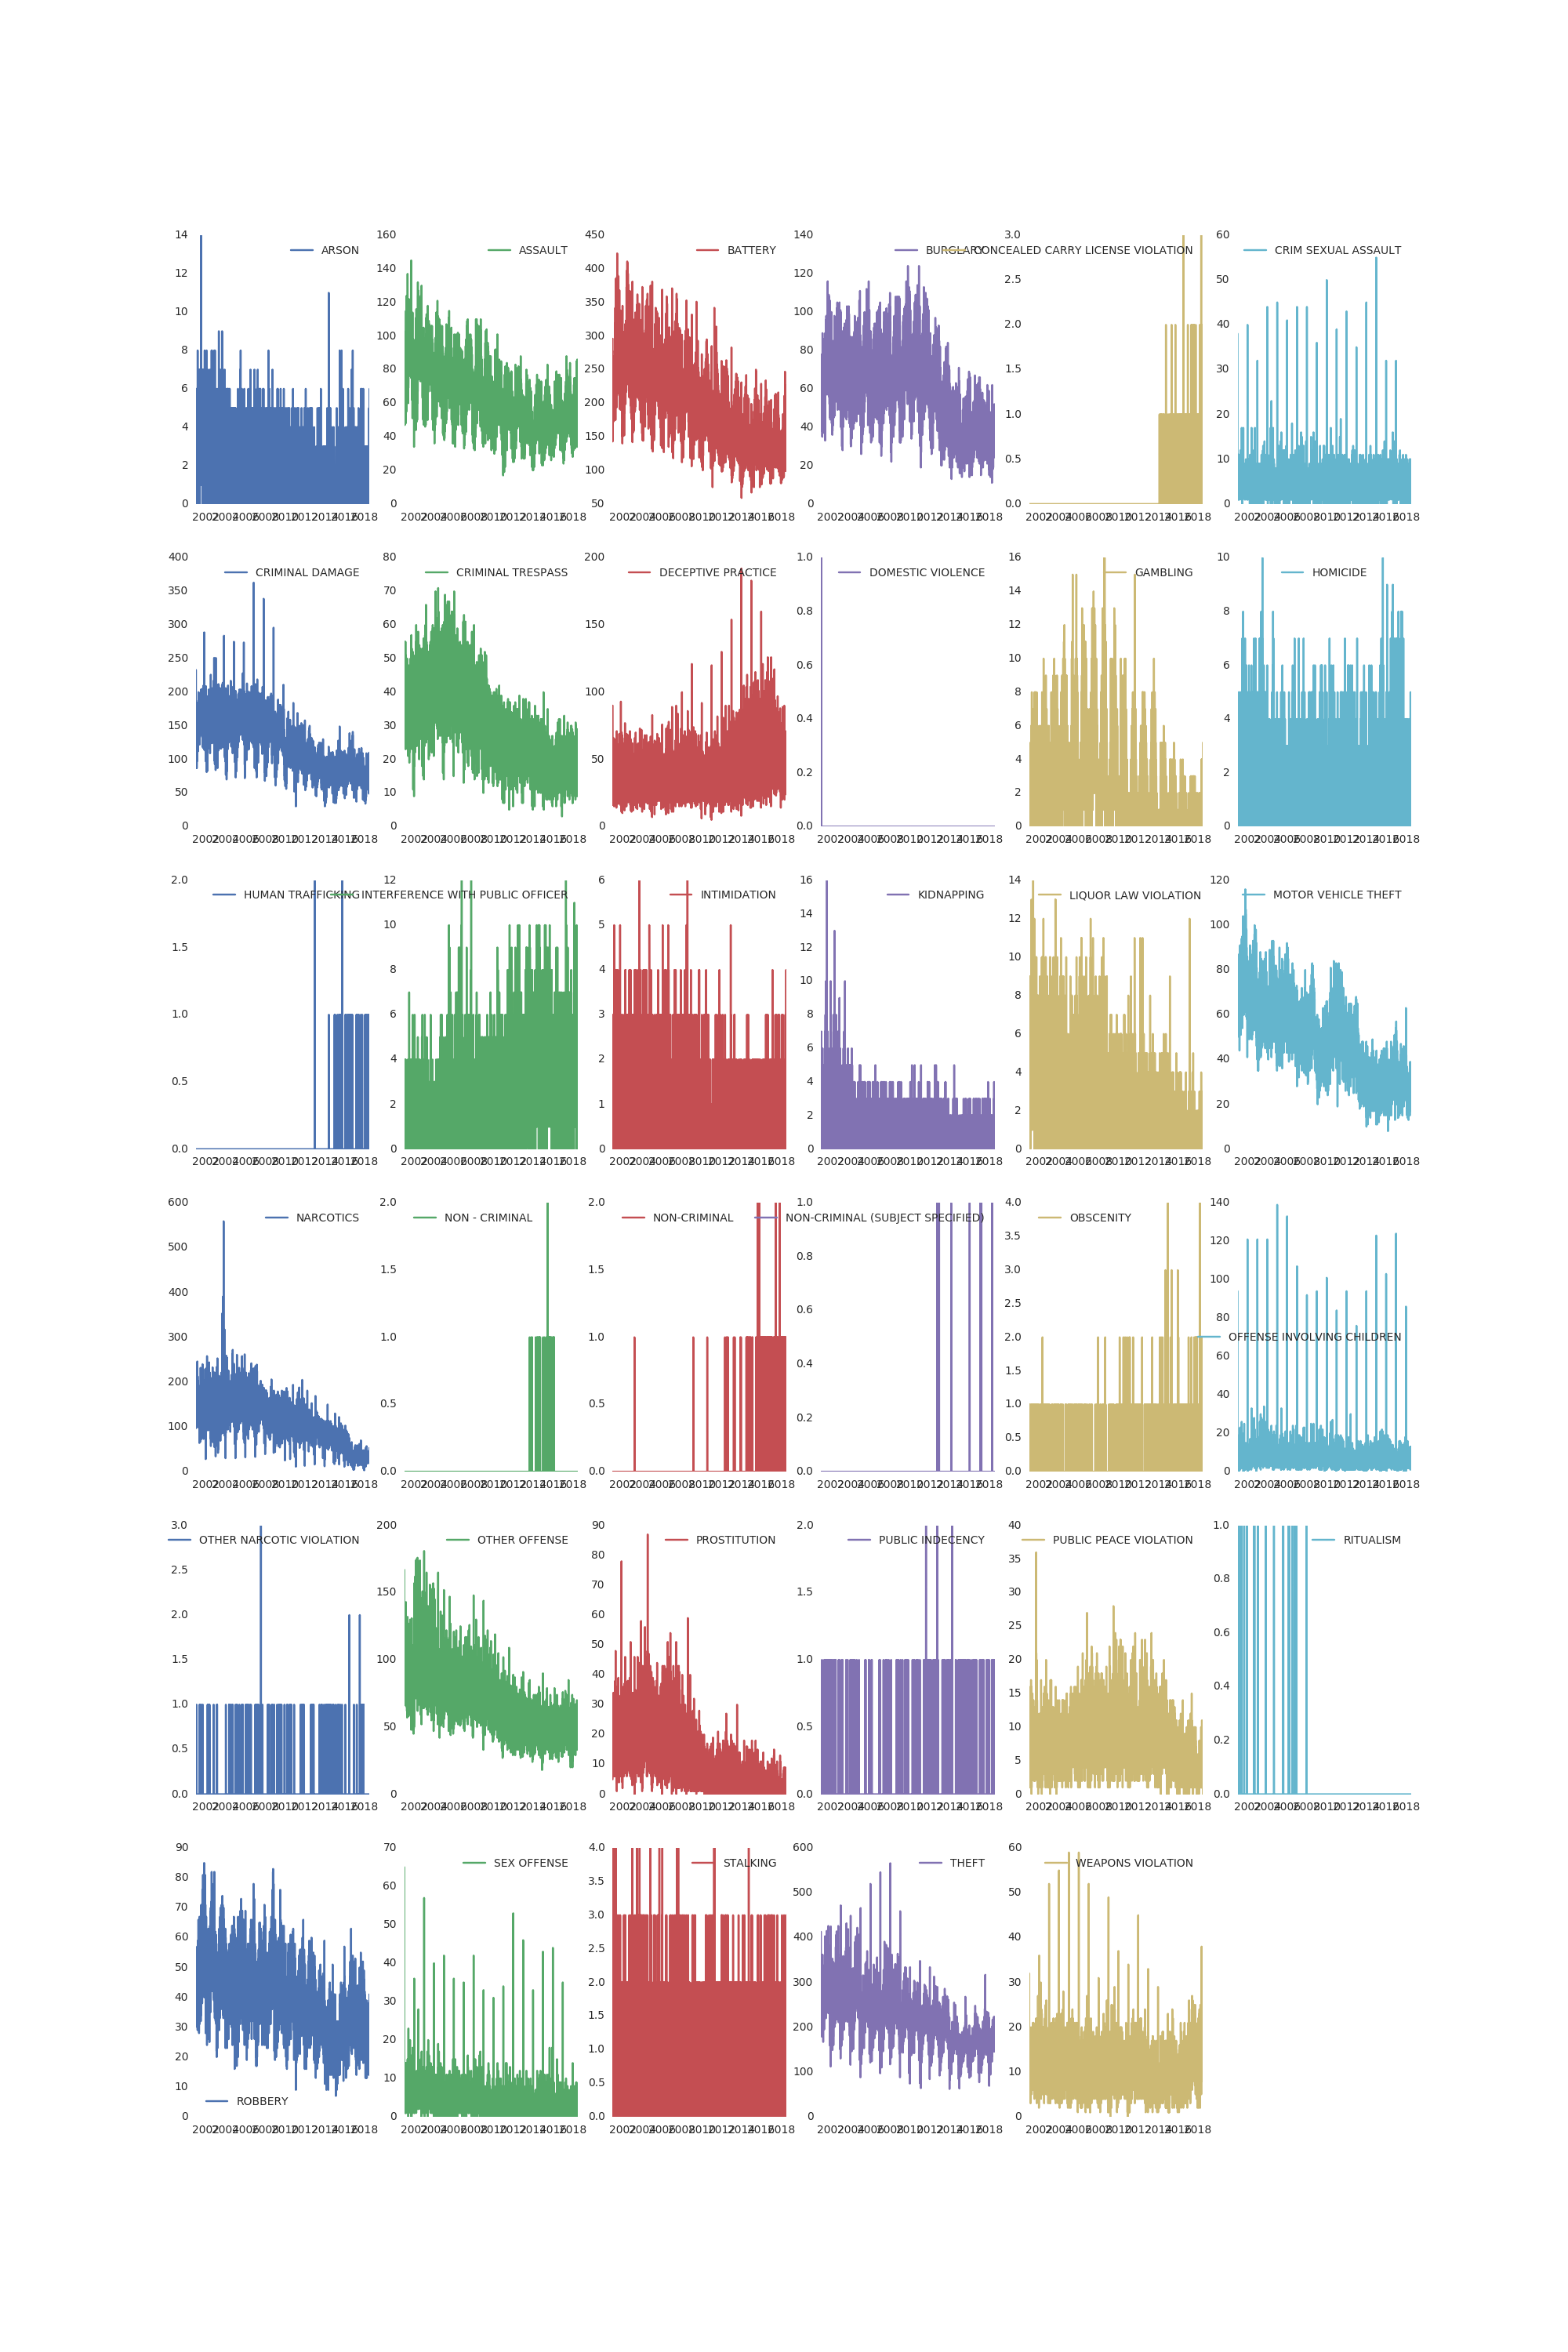

In [41]:
#make graph of different types of crimes per month
Plot = crimes_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False)
plt.show()
display()

In [42]:
#remove NAs from Longitude and Latitude data
crimes = crimes.dropna(axis = 0, how = 'any')

In [43]:
#extract year data for each crime, plot using matplotlib for each year the latitude and longitude variables
#make color by Description column
Groups = crimes.groupby(crimes['Primary Type'])
Groups = dict(list(Groups))
Keys = list(Groups.keys())

In [44]:
crimes_district = crimes.pivot_table('Arrest', aggfunc = np.sum, columns = ['District'], 
                                         index = crimes.index.date, fill_value = 0)
crimes_ward = crimes.pivot_table('Arrest', aggfunc = np.sum, columns = ['Ward'], 
                                         index = crimes.index.date, fill_value = 0)
crimes_ca = crimes.pivot_table('Arrest', aggfunc = np.sum, columns = ['Community Area'], 
                                         index = crimes.index.date, fill_value = 0)

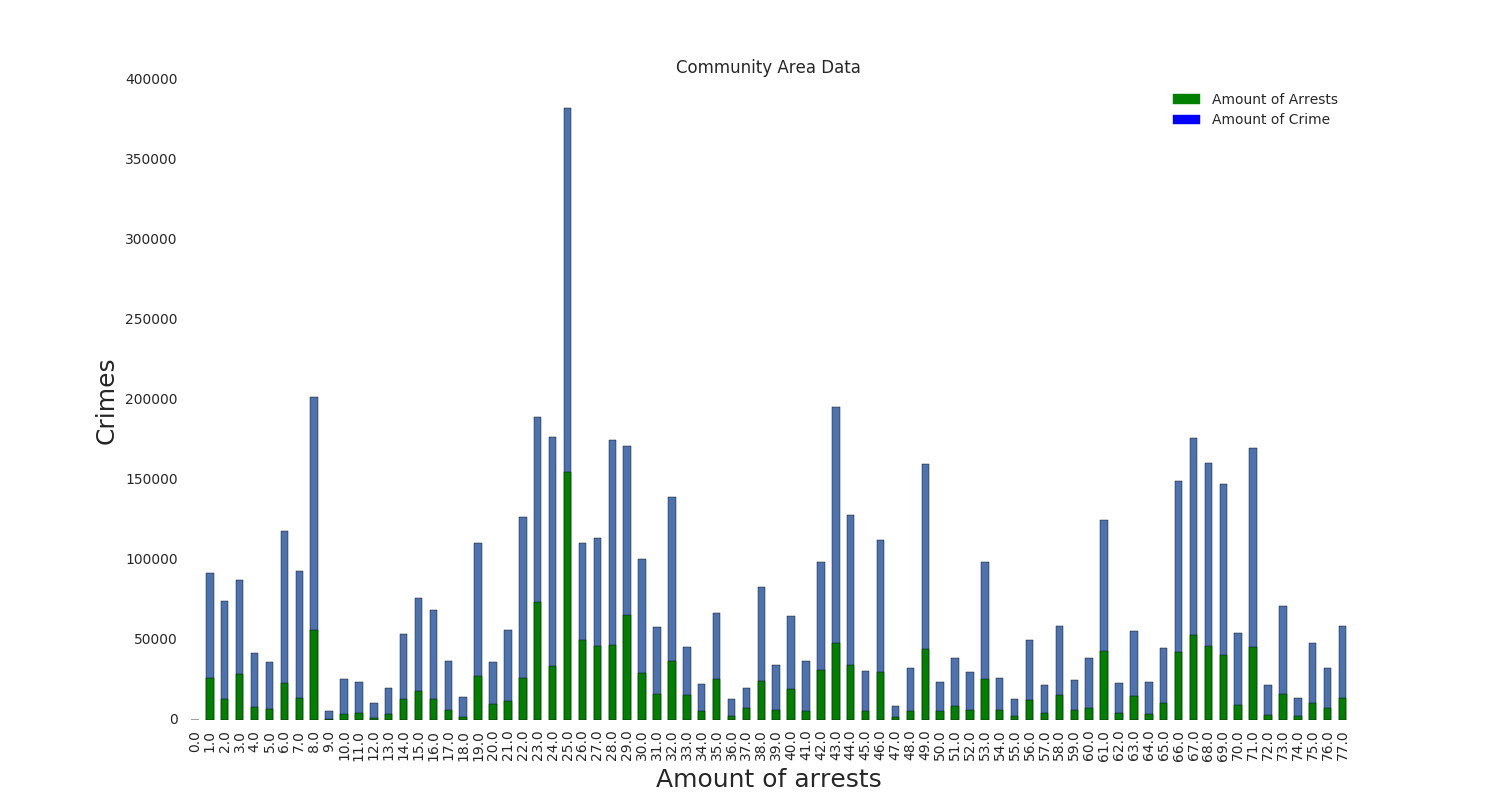

In [45]:
import matplotlib.patches as mpatches
green = mpatches.Patch(color='green', label='Amount of Arrests')
blue = mpatches.Patch(color='blue', label='Amount of Crime')


#crime per district
plt.figure(figsize = (8,5))
plt.hold(True)
crimes.groupby(crimes['District']).size().plot(kind = 'bar')
crimes_district.sum().plot(kind = 'bar', color = 'r')
plt.title('District Data')
plt.legend(handles=[green, blue])
plt.hold(False)
#crime per ward
plt.figure(figsize = (8,5))
plt.hold(True)
crimes.groupby(crimes['Ward']).size().plot(kind = 'bar')
crimes_ward.sum().plot(kind = 'bar', color = 'r')
plt.title('Ward Data')
plt.legend(handles=[green, blue])
plt.hold(False)
plt.show()
display()
#crime per Community Area
plt.figure(figsize = (15,8))
plt.hold(True)
crimes.groupby(crimes['Community Area']).size().plot(kind = 'bar')
crimes_ca.sum().plot(kind = 'bar', color = 'green')
plt.title('Community Area Data')
plt.xlabel("Amount of arrests", fontsize = 18)
plt.ylabel("Crimes", fontsize = 18)
plt.legend(handles=[green, blue])
plt.hold(False)
plt.show()
display()

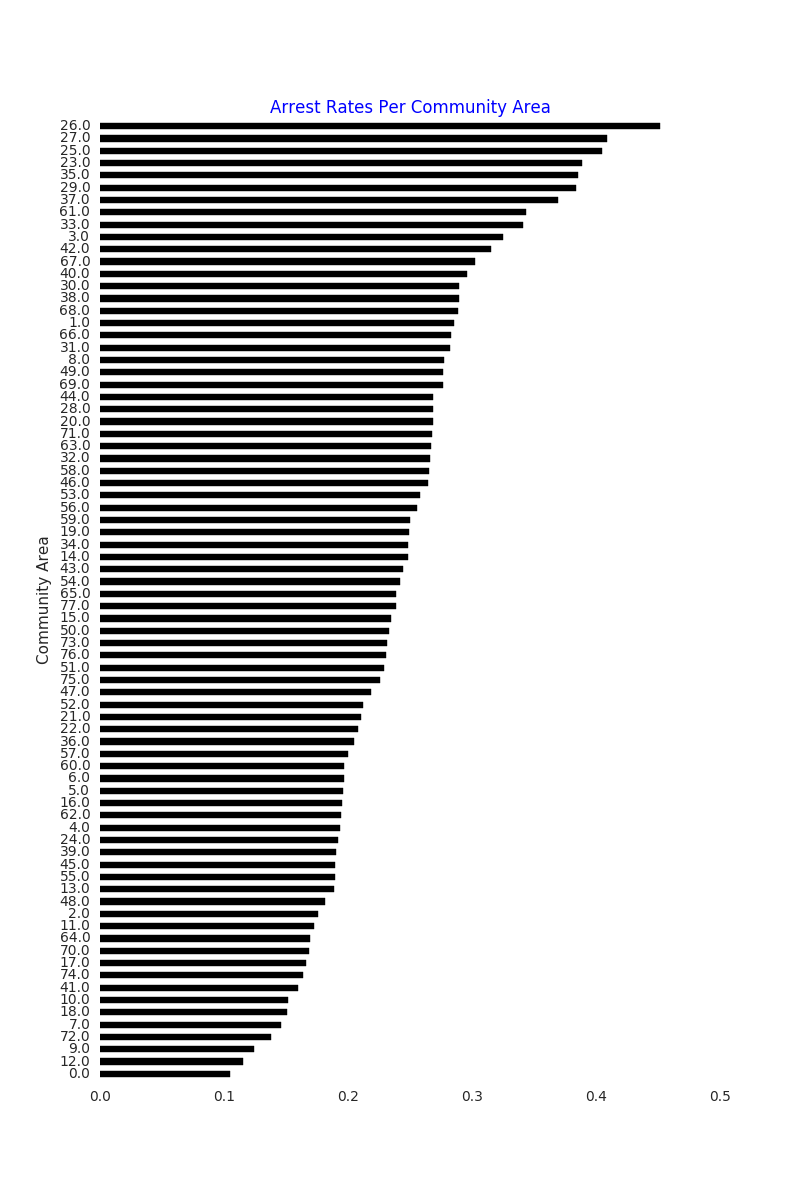

In [46]:
#Arrest rates per community area, ward, and district
A_R_D = crimes_district.sum() / crimes.groupby(crimes['District']).size()
A_R_W = crimes_ward.sum() / crimes.groupby(crimes['Ward']).size()
A_R_CA = crimes_ca.sum() / crimes.groupby(crimes['Community Area']).size()

plt.figure(figsize = (8,5))
A_R_D.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per District', color = 'b')
plt.figure(figsize = (8,10))
A_R_W.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Ward', color = 'b')
plt.figure(figsize=(8,12))
A_R_CA.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Community Area', color = 'b')
plt.('Arrest Rates Per Community Area', color = 'b')
plt.show()
display()

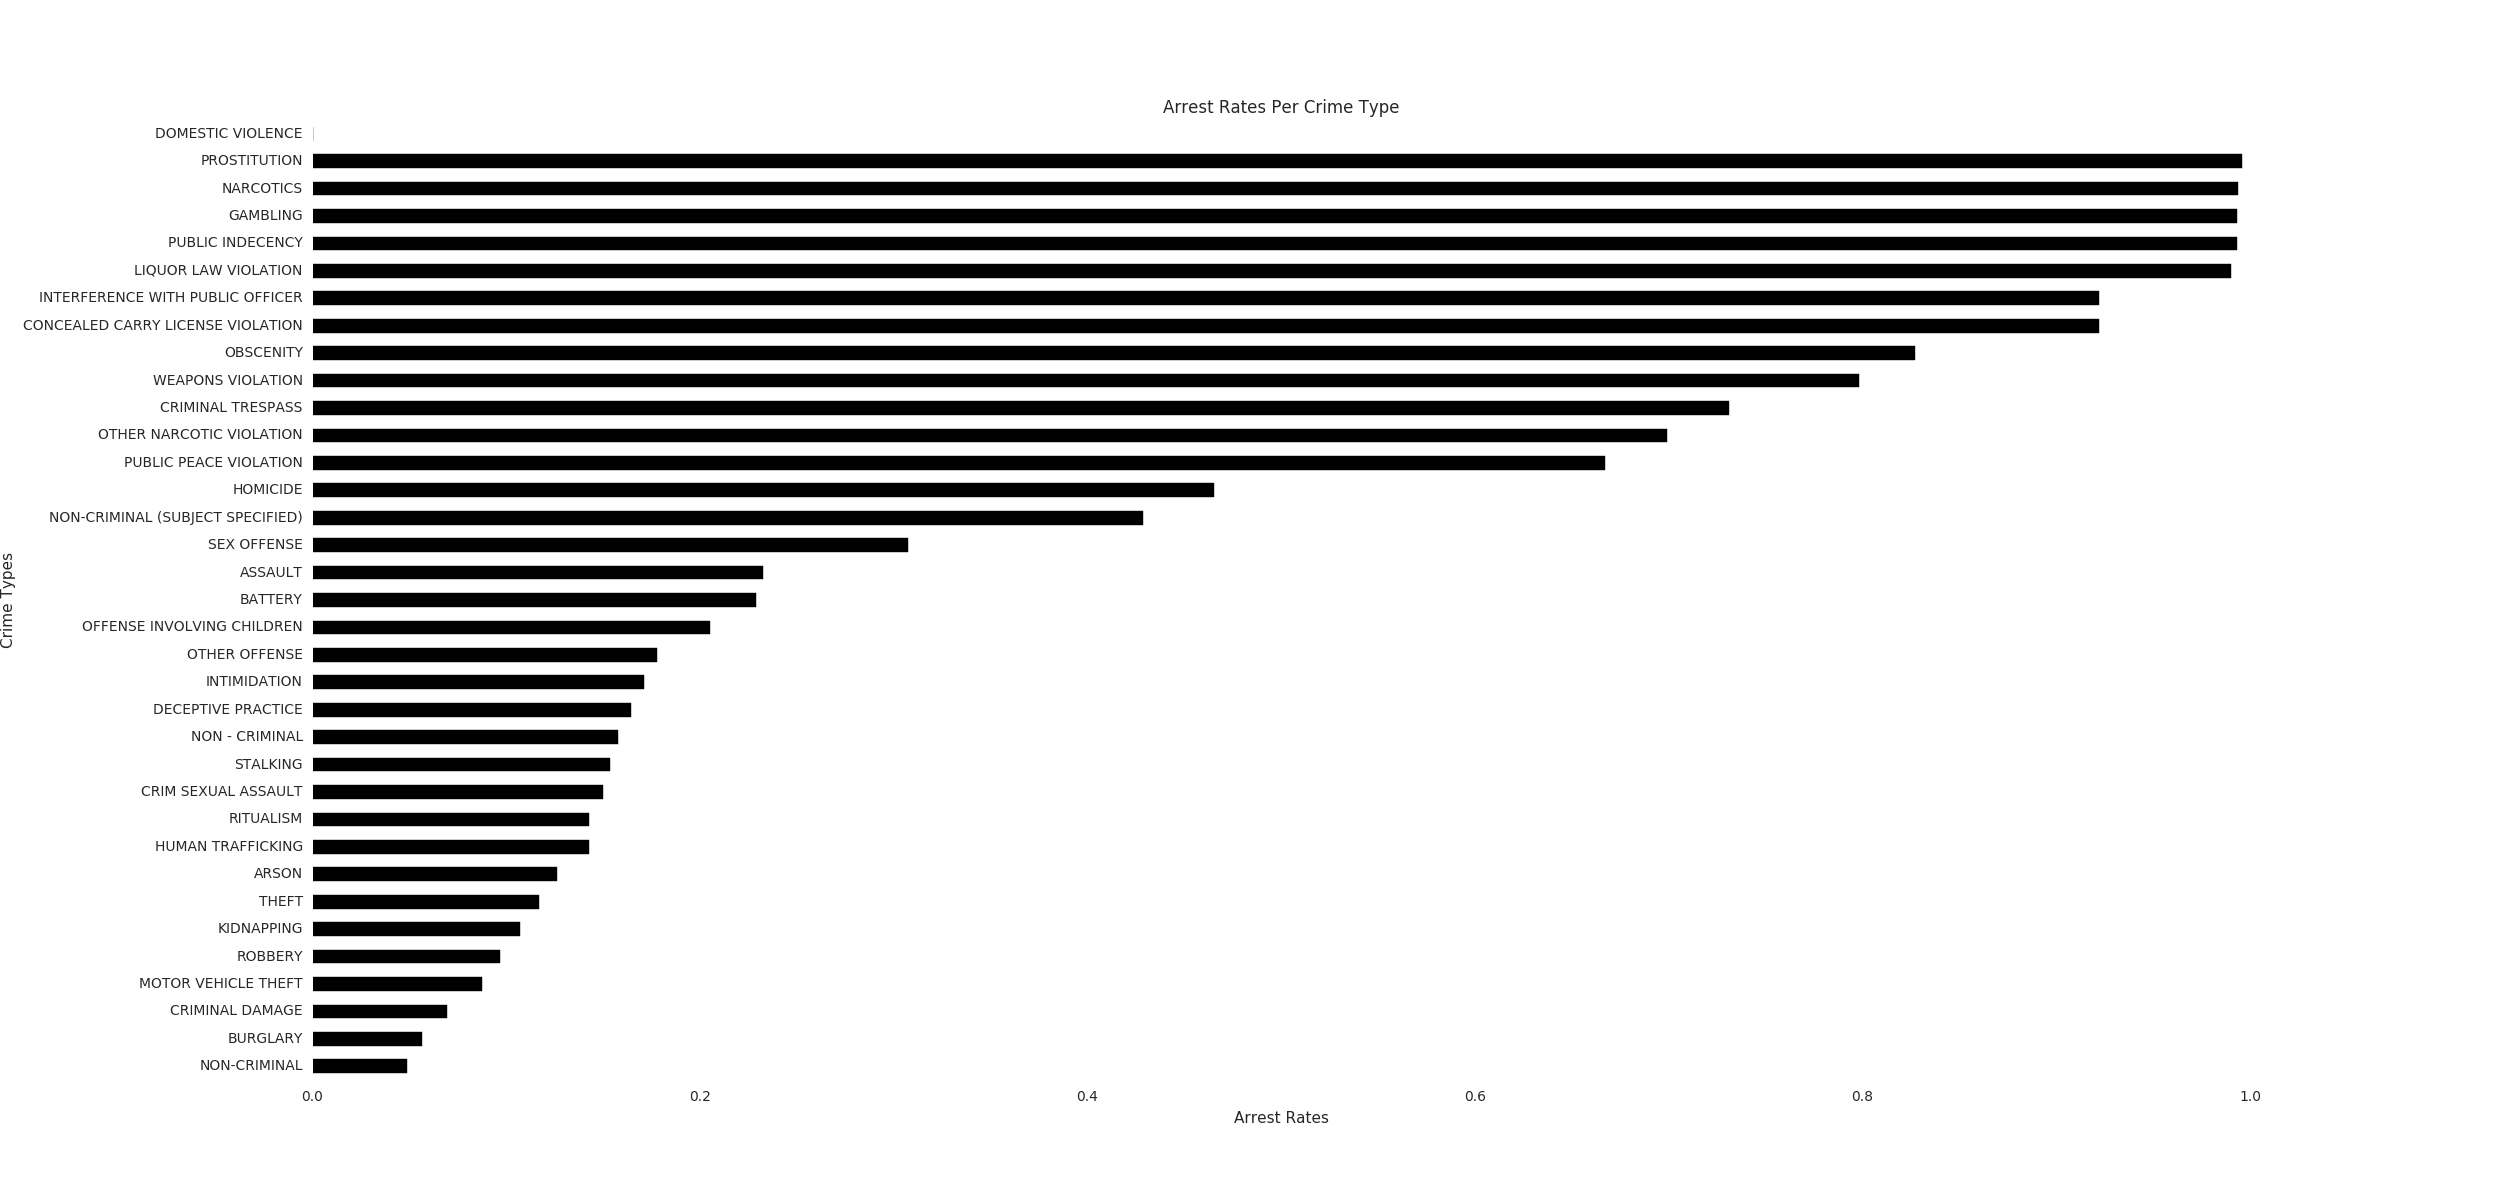

In [47]:
#Arrest rates per crime type
crimes_Type = crimes.pivot_table('Arrest', aggfunc = np.sum, columns = ['Primary Type'], 
                                         index = crimes.index.date, fill_value = 0)
#crime per district
plt.figure(figsize = (25,12))
plt.hold(True)
crimes.groupby(crimes['Primary Type']).size().plot(kind = 'barh')
crimes_Type.sum().plot(kind = 'barh', color = 'r')
plt.title('Crime Type Data')
plt.legend(handles=[red, blue])
plt.hold(False)


A_R_PT = crimes_Type.sum() / crimes.groupby(crimes['Primary Type']).size()
A_R_PT.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Crime Type')
plt.xlabel('Arrest Rates')
plt.ylabel('Crime Types')
plt.show()
display()

In [48]:
A = crimes_Type.sum() / crimes.groupby(crimes['Primary Type']).size()


In [49]:
mean_A = crimes['Arrest'].sum() / crimes.shape[0]


In [50]:
stderr_A = np.std(A) / (crimes_Type.shape[1]) ** (1/2.0)


In [51]:
high_A = mean_A + 1.96 * stderr_A
low_A = mean_A - 1.96 * stderr_A
print(A)
print("Average Arrest rate is 95% between (", low_A, ",", high_A, ")")

Primary Type
ARSON 0.125947
ASSAULT 0.232758
BATTERY 0.228963
BURGLARY 0.056477
CONCEALED CARRY LICENSE VIOLATION 0.922018
CRIM SEXUAL ASSAULT 0.149898
CRIMINAL DAMAGE 0.069621
CRIMINAL TRESPASS 0.731090
DECEPTIVE PRACTICE 0.164617
DOMESTIC VIOLENCE NaN
GAMBLING 0.993137
HOMICIDE 0.465320
HUMAN TRAFFICKING 0.142857
INTERFERENCE WITH PUBLIC OFFICER 0.922222
INTIMIDATION 0.170844
KIDNAPPING 0.106925
LIQUOR LAW VIOLATION 0.990128
MOTOR VEHICLE THEFT 0.087237
NARCOTICS 0.993888
NON - CRIMINAL 0.157895
NON-CRIMINAL 0.048951
NON-CRIMINAL (SUBJECT SPECIFIED) 0.428571
OBSCENITY 0.827038
OFFENSE INVOLVING CHILDREN 0.205162
OTHER NARCOTIC VIOLATION 0.699115
OTHER OFFENSE 0.177680
PROSTITUTION 0.995652
PUBLIC INDECENCY 0.993103
PUBLIC PEACE VIOLATION 0.667048
RITUALISM 0.142857
ROBBERY 0.096784
SEX OFFENSE 0.307355
STALKING 0.153718
THEFT 0.116848
WEAPONS VIOLATION 0.798437
dtype: float64
('Average Arrest rate is 95% between (', -0.11727314618027232, ',', 0.11727314618027232, ')')

In [52]:
for i in range(len(A)):
    if (A[i] <= low_A or A[i] >= high_A):
        print(A.index[i], A[i])

('ARSON', 0.12594667496628281)
('ASSAULT', 0.23275806190244694)
('BATTERY', 0.22896262453073551)
('CONCEALED CARRY LICENSE VIOLATION', 0.92201834862385323)
('CRIM SEXUAL ASSAULT', 0.14989839595313242)
('CRIMINAL TRESPASS', 0.731089665706252)
('DECEPTIVE PRACTICE', 0.16461706033748233)
('GAMBLING', 0.99313710538355959)
('HOMICIDE', 0.46531955954137816)
('HUMAN TRAFFICKING', 0.14285714285714285)
('INTERFERENCE WITH PUBLIC OFFICER', 0.92222222222222228)
('INTIMIDATION', 0.17084413713627197)
('LIQUOR LAW VIOLATION', 0.99012824839689506)
('NARCOTICS', 0.99388837729760404)
('NON - CRIMINAL', 0.15789473684210525)
('NON-CRIMINAL (SUBJECT SPECIFIED)', 0.42857142857142855)
('OBSCENITY', 0.82703777335984097)
('OFFENSE INVOLVING CHILDREN', 0.2051622603683749)
('OTHER NARCOTIC VIOLATION', 0.69911504424778759)
('OTHER OFFENSE', 0.17767966470140842)
('PROSTITUTION', 0.99565224689865872)
('PUBLIC INDECENCY', 0.99310344827586206)
('PUBLIC PEACE VIOLATION', 0.66704776713237146)
('RITUALISM', 0.14285714285714285)
('SEX OFFENSE', 0.30735539157343489)
('STALKING', 0.15371845949535193)
('WEAPONS VIOLATION', 0.79843665424905275)